<a href="https://colab.research.google.com/github/sumandutta8877/DATA-Analytics/blob/Jeel/DA_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data from GitHub

In [77]:
!git clone 'https://github.com/sumandutta8877/Data_DA.git'    # Run this Line for only one time

fatal: destination path 'Data_DA' already exists and is not an empty directory.


In [78]:
import pandas as pd
df_train = pd.read_csv('/content/Data_DA/Data/Train_data.csv')
df_test = pd.read_csv('/content/Data_DA/Data/Test_data.csv')
df_sample = pd.read_csv('/content/Data_DA/Data/Sample_submission.csv')

df1 = df_train            # df1 is the training dataframe
df2 = df_test             # df2 is the test dataframe

# Start Processing

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import LinearSVC

In [80]:
labels = dict(zip([1,2,3,4,5],df1['popularity'].unique()))
labels

{1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}

In [81]:
df1.loc[(df1['popularity']=='very low'), 'popularity level'] = 1
df1.loc[(df1['popularity']=='low'), 'popularity level'] = 2
df1.loc[(df1['popularity']=='average'), 'popularity level'] = 3
df1.loc[(df1['popularity']=='high'), 'popularity level'] = 4
df1.loc[(df1['popularity']=='very high'), 'popularity level'] = 5

**Pre Processing required**

In [82]:
import datetime as dt
import time as tm
today = dt.date.today()

# On train data set
df1['loudness'] = (-1)*df1['loudness']

df1['mode'] = df1['mode'].apply(lambda x: 1 if x == 'Major' else 0)
df1['explicit'] = df1['explicit'].apply(lambda x: 1 if x == 'Yes' else 0)

df1['release_date'] = pd.to_datetime(df1['release_date'])
df1['Today']=today
df1['Today']=pd.to_datetime(df1['Today'])
df1['days older']= (df1['Today']-df1['release_date']).dt.days



# On test data set
df2['loudness'] = (-1)*df2['loudness']

df2['mode'] = df2['mode'].apply(lambda x: 1 if x == 'Major' else 0)
df2['explicit'] = df2['explicit'].apply(lambda x: 1 if x == 'Yes' else 0)

df2['release_date'] = pd.to_datetime(df2['release_date'])
df2['Today']=today
df2['Today']=pd.to_datetime(df2['Today'])
df2['days older']= (df2['Today']-df2['release_date']).dt.days


In [83]:
#del df1['popularity']
#del df2['popularity']
#del df1['release_date']
#del df2['release_date']

In [84]:
df1.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity,popularity level,Today,days older
0,2015,0.949,0.235,0.0276,0,0.9270,5,0.513,27.398,1,1947-01-01,0.0381,110.838,0.0398,1947,3.0,very low,1.0,2021-03-10,27097
1,15901,0.855,0.456,0.4850,0,0.0884,4,0.151,10.046,1,2020-11-13,0.0437,152.066,0.8590,2020,2.4,low,2.0,2021-03-10,117
2,9002,0.827,0.495,0.4990,0,0.0000,0,0.401,8.009,0,1950-01-01,0.0474,108.004,0.7090,1950,2.6,very low,1.0,2021-03-10,26001
3,6734,0.654,0.643,0.4690,0,0.1080,7,0.218,15.917,1,1974-04-30,0.0368,83.636,0.9640,1974,2.4,low,2.0,2021-03-10,17116
4,15563,0.738,0.705,0.3110,0,0.0000,5,0.322,12.344,1,1973-01-01,0.0488,117.260,0.7850,1973,3.4,average,3.0,2021-03-10,17600


In [85]:
df2.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,Today,days older
0,4943,0.03360,0.523,0.861,0,0.000000,0,0.1440,3.447,1,2014-01-01,0.0644,127.049,0.346,2014,3.8,2021-03-10,2625
1,16165,0.76500,0.687,0.453,0,0.000008,7,0.0897,11.649,1,1972-01-04,0.0335,129.987,0.830,1972,3.8,2021-03-10,17963
2,6774,0.36300,0.536,0.640,0,0.000000,0,0.0948,5.862,1,1998-02-06,0.0368,142.483,0.289,1998,4.4,2021-03-10,8433
3,9959,0.00463,0.890,0.617,0,0.003850,2,0.0291,12.096,0,1980-08-09,0.0418,121.126,0.970,1980,3.9,2021-03-10,14823
4,13818,0.00187,0.555,0.943,0,0.000042,2,0.1510,2.492,1,2007-04-17,0.0891,165.026,0.882,2007,3.2,2021-03-10,5076


# **Data Visualization**

In [87]:
df1.columns

Index(['id', 'acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'release_date', 'speechiness', 'tempo', 'valence', 'year',
       'duration-min', 'popularity', 'popularity level', 'Today',
       'days older'],
      dtype='object')

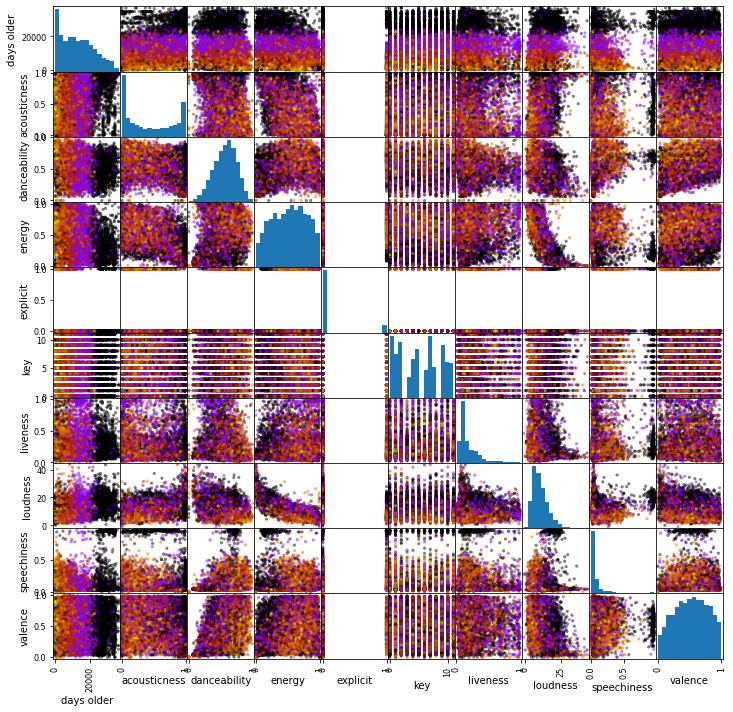

In [86]:

features1 = ['days older','acousticness', 'danceability', 'energy','key', 'liveness', 'loudness', 'speechiness', 'valence']
X_train = df1[features1]
y_train = df1['popularity level']

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train,c=y_train,s=40,hist_kwds={'bins':15},figsize=(12,12),cmap=cmap)

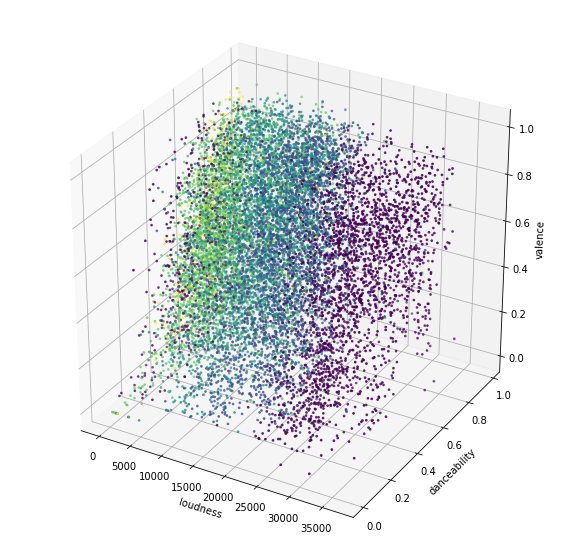

In [88]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X_train['days older'],X_train['danceability'],X_train['valence'], c=y_train,s=3)
ax.set_xlabel('loudness')
ax.set_ylabel('days older')
ax.set_ylabel('danceability')
ax.set_zlabel('valence')
plt.show()


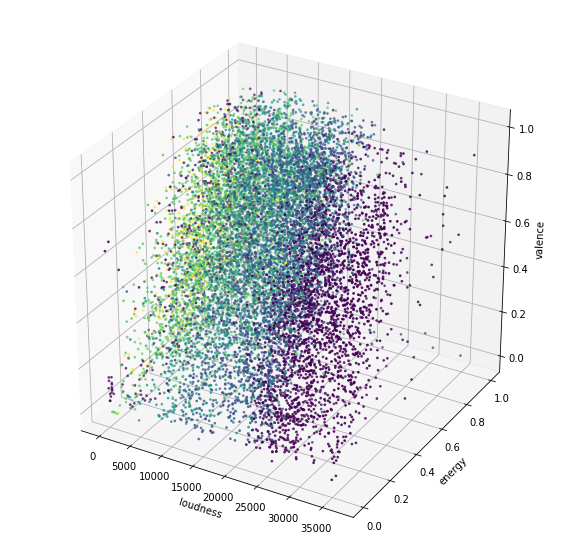

In [89]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X_train['days older'],X_train['energy'],X_train['valence'], c=y_train,s=3)
ax.set_xlabel('loudness')
ax.set_ylabel('days older')
ax.set_ylabel('energy')
ax.set_zlabel('valence')
plt.show()

# **LSVM with different regularization parameter**

In [12]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler




# **Kernelized SVM  with diff kernels,gamma parameters**

In [13]:
#remember to apply minMaxScaler before training a model.